# 🤖 Modern Robotics: 理論から実装まで

## Northwestern University専門講座の統合プレゼンテーション

### ロボット工学の数学的基礎から実装まで - 60分で学ぶ6コースの旅

**講演者**: [Your Name]

**日付**: 2025年1月

**GitHub Repository**: [github.com/hafnium49/modern_robotics_capstone_project](https://github.com/hafnium49/modern_robotics_capstone_project)

---

### 📚 本プレゼンテーションについて

このJupyter Notebookは、Northwestern UniversityのModern Robotics専門講座（全6コース）を統合し、理論から実装までを60分で解説するインタラクティブなプレゼンテーションです。

Kevin Lynch & Frank Park 著「Modern Robotics: Mechanics, Planning, and Control」に基づく内容を、実行可能なコードとビジュアライゼーションと共にお届けします。

In [1]:
# 必要なライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle, Rectangle, Ellipse, Arrow
import matplotlib.patches as patches
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# Jupyter用の設定
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 日本語フォントの設定（必要に応じて）
# plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

print("セットアップ完了！")

セットアップ完了！


---

## 📊 講座の全体像

### 6つのコースで構成される包括的なロボティクス教育

| Course | タイトル | 内容 |
|--------|----------|------|
| **Course 1** | ロボット運動の基礎 | Configuration Space & 剛体運動 |
| **Course 2** | ロボットキネマティクス | 順・逆運動学 |
| **Course 3** | ロボットダイナミクス | 力とトルクの世界 |
| **Course 4** | 軌道生成と制御 | 動作計画とフィードバック |
| **Course 5** | マニピュレーション | 把持と移動ロボット |
| **Course 6** | Capstone Project | モバイルマニピュレーション実装 |

> 💡 **キーポイント**: すべてがCapstone Projectで統合される - 理論と実装の美しい融合

---

## 🎯 なぜModern Roboticsなのか？

### 従来のアプローチ vs Modern Roboticsアプローチ

#### ❌ 従来のアプローチ（D-Hパラメータ）
- 各関節に座標系を設定
- 複雑な記号操作
- 特異点での問題

#### ✅ Modern Roboticsアプローチ（Product of Exponentials）
- スクリュー理論とLie群
- グローバルに有効
- 計算効率が高い

### 基本式：Product of Exponentials (PoE)

$$T(\theta) = e^{[S_1]\theta_1} e^{[S_2]\theta_2} \cdots e^{[S_n]\theta_n} M$$

**キーポイント：幾何学的直感と代数的エレガンスの融合**

---

## 🌍 Course 1: Configuration Space（C空間）

### ロボットの「居場所」を数学的に定義する

**Configuration（配置）とは？**
> ロボットのすべての点の位置を完全に指定する最小限のパラメータ集合

### Grüblerの公式

$$\text{DoF} = m(N-1-J) + \sum f_i$$

- **m**: 空間次元（平面=3, 空間=6）
- **N**: リンク数
- **J**: ジョイント数
- **fᵢ**: 各ジョイントの自由度

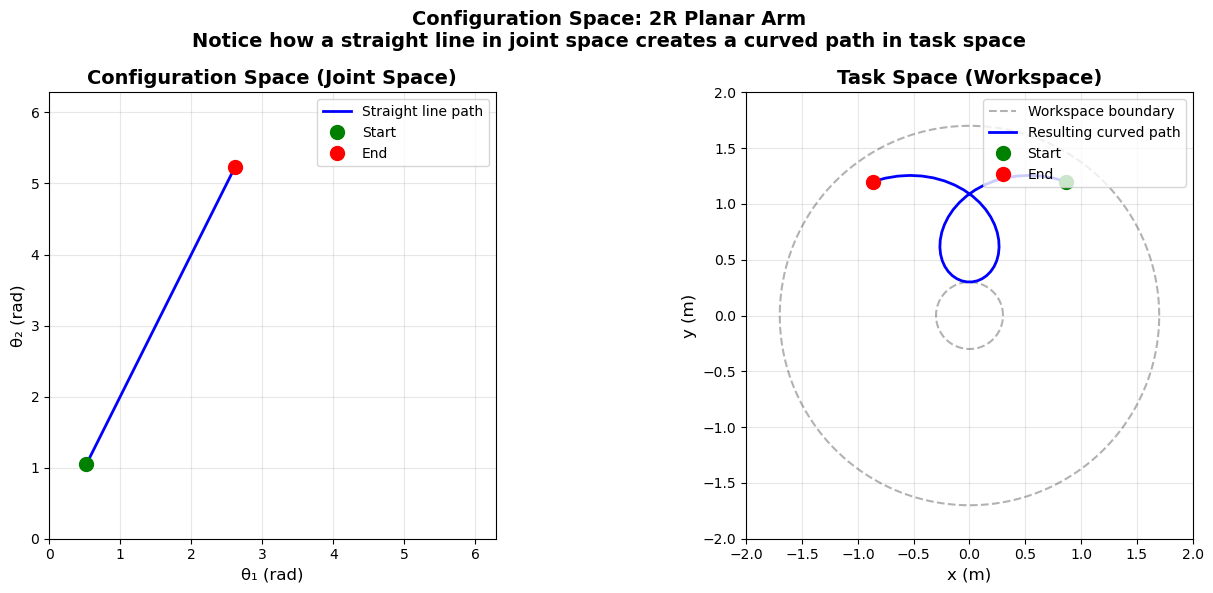


💡 重要な洞察：
• C空間のトポロジー: T² = S¹ × S¹ (トーラス)
• 各関節角度が2πで周期的→トーラス構造
• 関節空間の直線→作業空間の曲線


In [2]:
# Simulation 1: Configuration Space Visualization
# 2R Planar Arm - Joint Space to Task Space Mapping

class TwoLinkArm:
    def __init__(self, L1=1.0, L2=0.7):
        self.L1 = L1  # Length of first link
        self.L2 = L2  # Length of second link
        
    def forward_kinematics(self, theta1, theta2):
        """Compute end-effector position from joint angles"""
        x1 = self.L1 * np.cos(theta1)
        y1 = self.L1 * np.sin(theta1)
        
        x2 = x1 + self.L2 * np.cos(theta1 + theta2)
        y2 = y1 + self.L2 * np.sin(theta1 + theta2)
        
        return x1, y1, x2, y2
    
    def get_workspace_boundary(self, n_points=1000):
        """Get the reachable workspace boundary"""
        theta = np.linspace(0, 2*np.pi, n_points)
        
        # Outer circle (full extension)
        r_max = self.L1 + self.L2
        outer_x = r_max * np.cos(theta)
        outer_y = r_max * np.sin(theta)
        
        # Inner circle (if L1 > L2)
        if self.L1 > self.L2:
            r_min = self.L1 - self.L2
            inner_x = r_min * np.cos(theta)
            inner_y = r_min * np.sin(theta)
        else:
            inner_x = inner_y = None
            
        return outer_x, outer_y, inner_x, inner_y

# Create visualization
robot = TwoLinkArm(L1=1.0, L2=0.7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Configuration space (left)
ax1.set_title('Configuration Space (Joint Space)', fontsize=14, fontweight='bold')
ax1.set_xlabel('θ₁ (rad)', fontsize=12)
ax1.set_ylabel('θ₂ (rad)', fontsize=12)
ax1.set_xlim([0, 2*np.pi])
ax1.set_ylim([0, 2*np.pi])
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Task space (right)
ax2.set_title('Task Space (Workspace)', fontsize=14, fontweight='bold')
ax2.set_xlabel('x (m)', fontsize=12)
ax2.set_ylabel('y (m)', fontsize=12)
ax2.set_xlim([-2, 2])
ax2.set_ylim([-2, 2])
ax2.grid(True, alpha=0.3)
ax2.set_aspect('equal')

# Draw workspace boundary
outer_x, outer_y, inner_x, inner_y = robot.get_workspace_boundary()
ax2.plot(outer_x, outer_y, 'k--', alpha=0.3, label='Workspace boundary')
if inner_x is not None:
    ax2.plot(inner_x, inner_y, 'k--', alpha=0.3)

# Path: Straight line in joint space
n_points = 50
t = np.linspace(0, 1, n_points)

theta1_start, theta2_start = np.pi/6, np.pi/3
theta1_end, theta2_end = 5*np.pi/6, 5*np.pi/3

theta1_path = theta1_start + t * (theta1_end - theta1_start)
theta2_path = theta2_start + t * (theta2_end - theta2_start)

# Plot joint space path
ax1.plot(theta1_path, theta2_path, 'b-', linewidth=2, label='Straight line path')
ax1.plot(theta1_start, theta2_start, 'go', markersize=10, label='Start')
ax1.plot(theta1_end, theta2_end, 'ro', markersize=10, label='End')

# Compute and plot task space path
x_path = []
y_path = []
for theta1, theta2 in zip(theta1_path, theta2_path):
    _, _, x, y = robot.forward_kinematics(theta1, theta2)
    x_path.append(x)
    y_path.append(y)

ax2.plot(x_path, y_path, 'b-', linewidth=2, label='Resulting curved path')
ax2.plot(x_path[0], y_path[0], 'go', markersize=10, label='Start')
ax2.plot(x_path[-1], y_path[-1], 'ro', markersize=10, label='End')

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

plt.suptitle('Configuration Space: 2R Planar Arm\n'
             'Notice how a straight line in joint space creates a curved path in task space',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 重要な洞察：")
print("• C空間のトポロジー: T² = S¹ × S¹ (トーラス)")
print("• 各関節角度が2πで周期的→トーラス構造")
print("• 関節空間の直線→作業空間の曲線")

---

## 🔄 剛体運動とSE(3)

### 回転と並進の美しい統一理論

#### 同次変換行列

$$T = \begin{bmatrix} R & p \\ 0 & 1 \end{bmatrix} \in SE(3)$$

- **R**: 3×3回転行列（SO(3)）
- **p**: 3×1位置ベクトル

#### Twist（ツイスト）
- 瞬間的な速度を表現
- V = [ω, v]（6次元ベクトル）
- スクリュー運動の一般化

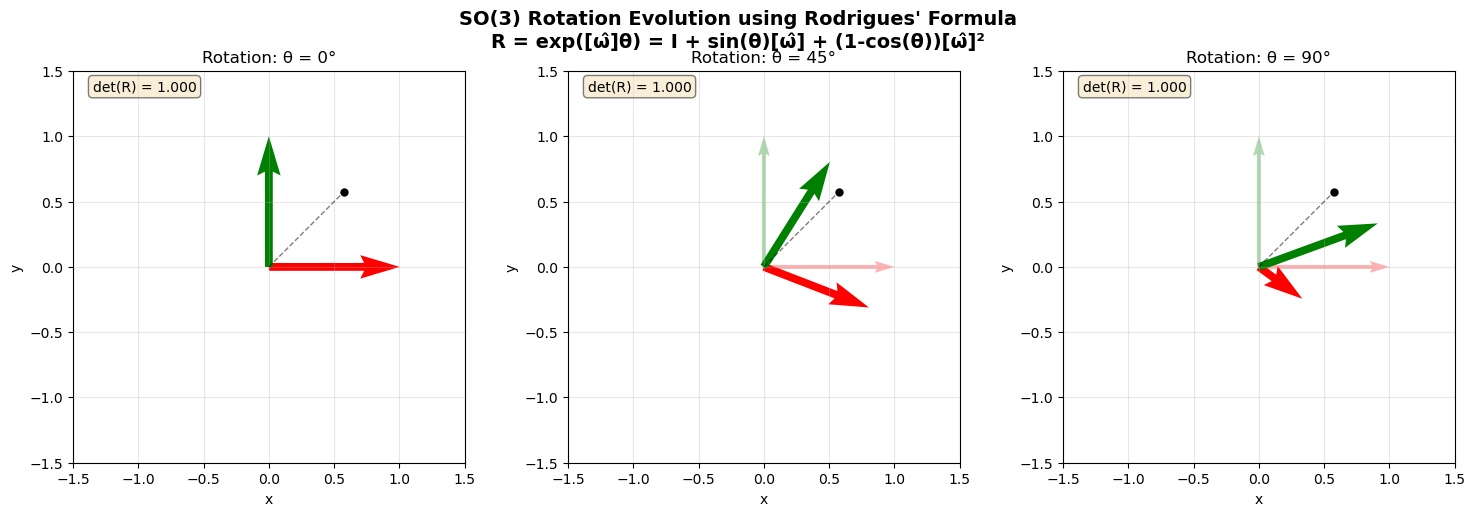


💡 キーポイント：
• 回転行列は常にdet(R) = 1を保つ
• Rodrigues公式により、軸-角度表現から回転行列を効率的に計算
• 指数写像: R = exp([ω̂]θ)


In [3]:
# Simulation 2: Rigid Body Motion - Rotation Matrix Evolution

def rotation_matrix(axis, theta):
    """Create rotation matrix using Rodrigues' formula"""
    axis = axis / np.linalg.norm(axis)
    a = np.cos(theta / 2)
    b, c, d = -axis * np.sin(theta / 2)
    return np.array([
        [a*a+b*b-c*c-d*d, 2*(b*c-a*d), 2*(b*d+a*c)],
        [2*(b*c+a*d), a*a+c*c-b*b-d*d, 2*(c*d-a*b)],
        [2*(b*d-a*c), 2*(c*d+a*b), a*a+d*d-b*b-c*c]
    ])

# Demonstrate rotation evolution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Different rotation angles
angles = [0, np.pi/4, np.pi/2]
axis = np.array([1, 1, 1]) / np.sqrt(3)

for idx, (ax, theta) in enumerate(zip(axes, angles)):
    R = rotation_matrix(axis, theta)
    
    # Original frame (identity)
    origin = np.zeros(3)
    x_axis = np.array([1, 0, 0])
    y_axis = np.array([0, 1, 0])
    z_axis = np.array([0, 0, 1])
    
    # Rotated frame
    x_rot = R @ x_axis
    y_rot = R @ y_axis
    z_rot = R @ z_axis
    
    # Plot
    ax.set_title(f'Rotation: θ = {np.degrees(theta):.0f}°', fontsize=12)
    
    # Original axes (transparent)
    ax.quiver(0, 0, x_axis[0], x_axis[1], color='r', alpha=0.3, scale=3, width=0.01)
    ax.quiver(0, 0, y_axis[0], y_axis[1], color='g', alpha=0.3, scale=3, width=0.01)
    
    # Rotated axes
    ax.quiver(0, 0, x_rot[0], x_rot[1], color='r', scale=3, width=0.02)
    ax.quiver(0, 0, y_rot[0], y_rot[1], color='g', scale=3, width=0.02)
    
    # Rotation axis
    ax.plot([0, axis[0]], [0, axis[1]], 'k--', alpha=0.5, linewidth=1)
    ax.plot(axis[0], axis[1], 'ko', markersize=5)
    
    ax.set_xlim([-1.5, 1.5])
    ax.set_ylim([-1.5, 1.5])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    # Show rotation matrix values
    det_R = np.linalg.det(R)
    ax.text(0.05, 0.95, f'det(R) = {det_R:.3f}', 
            transform=ax.transAxes, fontsize=10,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle("SO(3) Rotation Evolution using Rodrigues' Formula\n"
             "R = exp([ω̂]θ) = I + sin(θ)[ω̂] + (1-cos(θ))[ω̂]²",
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 キーポイント：")
print("• 回転行列は常にdet(R) = 1を保つ")
print("• Rodrigues公式により、軸-角度表現から回転行列を効率的に計算")
print("• 指数写像: R = exp([ω̂]θ)")

---

## ⚙️ Course 2: 順運動学（Forward Kinematics）

### Product of Exponentials (PoE) アプローチ

#### 実装の3ステップ

1. **ホームポーズMを測定**
2. **各関節のスクリュー軸Sᵢを計算**
   - 回転関節: ω̂ = 単位軸, v = -ω̂×q
   - 並進関節: ω = 0, v = 単位方向
3. **PoE公式を評価**

$$T(\theta) = e^{[S_1]\theta_1} e^{[S_2]\theta_2} \cdots e^{[S_n]\theta_n} M$$

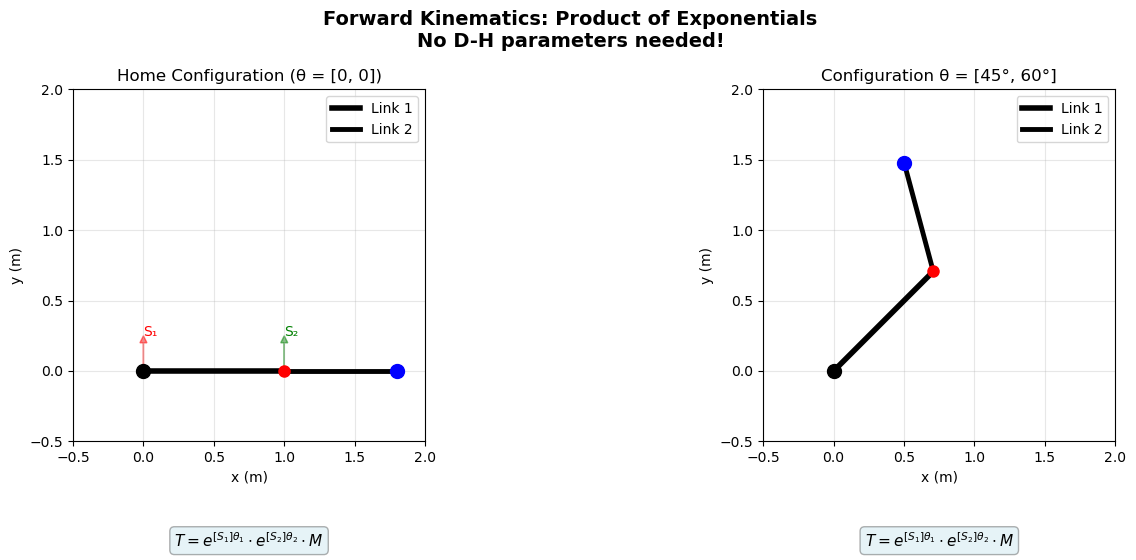


💡 PoEの利点：
• 座標系の設定が最小限（基準系と終端系のみ）
• スクリュー軸は直感的に定義可能
• 特異点でも数値的に安定


In [4]:
# Simulation 3: Forward Kinematics using PoE

def skew(v):
    """Convert 3D vector to skew-symmetric matrix"""
    return np.array([
        [0, -v[2], v[1]],
        [v[2], 0, -v[0]],
        [-v[1], v[0], 0]
    ])

def exp_rotation(omega_hat, theta):
    """Matrix exponential for rotation (Rodrigues' formula)"""
    omega_skew = skew(omega_hat)
    return np.eye(3) + np.sin(theta) * omega_skew + (1 - np.cos(theta)) * omega_skew @ omega_skew

# Simple 2R robot demonstration
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Robot parameters
L1, L2 = 1.0, 0.8

# Different configurations
configs = [
    [0, 0],
    [np.pi/4, np.pi/3]
]

for ax, theta in zip(axes, configs):
    # Compute positions (simplified 2D)
    x1 = L1 * np.cos(theta[0])
    y1 = L1 * np.sin(theta[0])
    x2 = x1 + L2 * np.cos(theta[0] + theta[1])
    y2 = y1 + L2 * np.sin(theta[0] + theta[1])
    
    # Draw robot
    ax.plot([0, x1], [0, y1], 'k-', linewidth=4, label='Link 1')
    ax.plot([x1, x2], [y1, y2], 'k-', linewidth=3.5, label='Link 2')
    
    # Draw joints
    ax.plot(0, 0, 'ko', markersize=10)
    ax.plot(x1, y1, 'ro', markersize=8)
    ax.plot(x2, y2, 'bo', markersize=10)
    
    # Draw screw axes at home
    if theta[0] == 0 and theta[1] == 0:
        ax.arrow(0, 0, 0, 0.2, head_width=0.05, head_length=0.05, fc='red', ec='red', alpha=0.5)
        ax.text(0, 0.25, 'S₁', fontsize=10, color='red')
        ax.arrow(L1, 0, 0, 0.2, head_width=0.05, head_length=0.05, fc='green', ec='green', alpha=0.5)
        ax.text(L1, 0.25, 'S₂', fontsize=10, color='green')
        ax.set_title('Home Configuration (θ = [0, 0])', fontsize=12)
    else:
        ax.set_title(f'Configuration θ = [{np.degrees(theta[0]):.0f}°, {np.degrees(theta[1]):.0f}°]', fontsize=12)
    
    ax.set_xlim([-0.5, 2])
    ax.set_ylim([-0.5, 2])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.legend(loc='upper right')
    
    # Show PoE formula
    ax.text(0.5, -0.3, r'$T = e^{[S_1]\theta_1} \cdot e^{[S_2]\theta_2} \cdot M$',
            transform=ax.transAxes, fontsize=11, ha='center',
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.3))

plt.suptitle('Forward Kinematics: Product of Exponentials\n'
             'No D-H parameters needed!',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 PoEの利点：")
print("• 座標系の設定が最小限（基準系と終端系のみ）")
print("• スクリュー軸は直感的に定義可能")
print("• 特異点でも数値的に安定")

---

## 📐 ヤコビアンと速度運動学

### 関節速度からタスク空間速度への写像

$$V = J(\theta) \dot{\theta}$$

#### ヤコビアンの物理的意味
- 各列 = 1つの関節だけが動いた時のツイスト
- 特異点 = rank(J) < 6
- マニピュラビリティ楕円体

#### 静力学への応用
$$\tau = J^T(\theta) F$$

同じヤコビアンが力の伝達も記述！

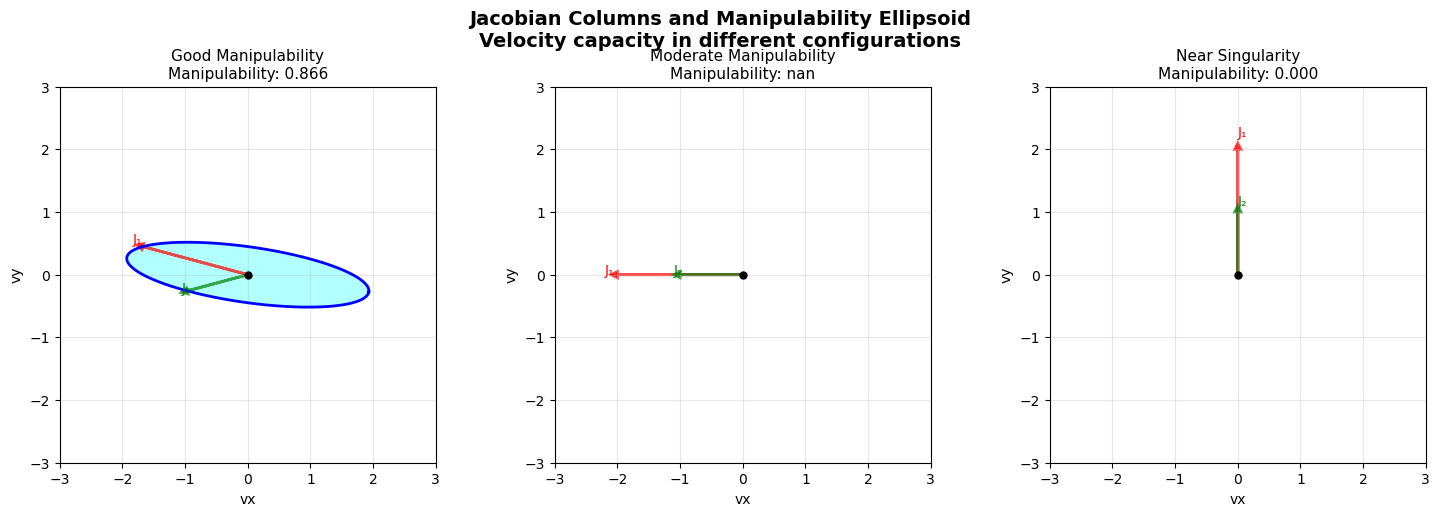


💡 重要な洞察：
• マニピュラビリティ楕円体は速度発生能力を可視化
• 特異点近傍では楕円体が潰れる
• 力楕円体は速度楕円体の双対（逆関係）


In [5]:
# Simulation 4: Jacobian and Manipulability Ellipsoid

class JacobianDemo:
    def __init__(self, L1=1.0, L2=1.0):
        self.L1 = L1
        self.L2 = L2
    
    def compute_jacobian(self, theta1, theta2):
        """Compute the 2x2 Jacobian matrix"""
        J = np.array([
            [-self.L1*np.sin(theta1) - self.L2*np.sin(theta1+theta2), 
             -self.L2*np.sin(theta1+theta2)],
            [self.L1*np.cos(theta1) + self.L2*np.cos(theta1+theta2),  
             self.L2*np.cos(theta1+theta2)]
        ])
        return J
    
    def compute_manipulability(self, theta1, theta2):
        """Compute manipulability measure"""
        J = self.compute_jacobian(theta1, theta2)
        return np.sqrt(np.linalg.det(J @ J.T))

# Create visualization
demo = JacobianDemo()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Test configurations
configs = [
    (np.pi/4, np.pi/3, "Good Manipulability"),
    (np.pi/2, 0, "Moderate Manipulability"),
    (0, 0, "Near Singularity")
]

for ax, (theta1, theta2, title) in zip(axes, configs):
    # Compute Jacobian
    J = demo.compute_jacobian(theta1, theta2)
    manip = demo.compute_manipulability(theta1, theta2)
    
    # Compute manipulability ellipse
    A = J @ J.T
    eigenvalues, eigenvectors = np.linalg.eig(A)
    
    # Sort by eigenvalue magnitude
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    # Draw ellipse
    theta_ellipse = np.linspace(0, 2*np.pi, 100)
    circle = np.array([np.cos(theta_ellipse), np.sin(theta_ellipse)])
    
    # Transform circle to ellipse
    if eigenvalues[1] > 1e-10:
        scale = np.diag(np.sqrt(eigenvalues))
        ellipse = eigenvectors @ scale @ circle
        
        ax.plot(ellipse[0, :], ellipse[1, :], 'b-', linewidth=2, label='Velocity Ellipsoid')
        ax.fill(ellipse[0, :], ellipse[1, :], 'cyan', alpha=0.3)
    
    # Draw Jacobian columns
    col1 = J[:, 0]
    col2 = J[:, 1]
    
    ax.arrow(0, 0, col1[0], col1[1], head_width=0.1, head_length=0.1, 
             fc='red', ec='red', alpha=0.7, linewidth=2)
    ax.arrow(0, 0, col2[0], col2[1], head_width=0.1, head_length=0.1, 
             fc='green', ec='green', alpha=0.7, linewidth=2)
    
    ax.text(col1[0]*1.1, col1[1]*1.1, 'J₁', fontsize=10, color='red')
    ax.text(col2[0]*1.1, col2[1]*1.1, 'J₂', fontsize=10, color='green')
    
    ax.set_title(f'{title}\nManipulability: {manip:.3f}', fontsize=11)
    ax.set_xlabel('vx')
    ax.set_ylabel('vy')
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    
    # Add origin
    ax.plot(0, 0, 'ko', markersize=5)

plt.suptitle('Jacobian Columns and Manipulability Ellipsoid\n'
             'Velocity capacity in different configurations',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 重要な洞察：")
print("• マニピュラビリティ楕円体は速度発生能力を可視化")
print("• 特異点近傍では楕円体が潰れる")
print("• 力楕円体は速度楕円体の双対（逆関係）")

---

## 📈 Course 4: 軌道生成

### パスと時間スケーリングの分離

**軌道 = パス（幾何学）+ 時間スケーリング**

#### パスの種類
- **関節空間直線**: θ(s) = θ₀ + s(θf - θ₀)
- **タスク空間直線**: デカップル並進+回転
- **定スクリュー運動**: SE(3)での補間

#### 時間スケーリング
- **台形速度**: 加速-定速-減速
- **S字カーブ**: ジャーク制限
- **5次多項式**: 滑らかな始終点

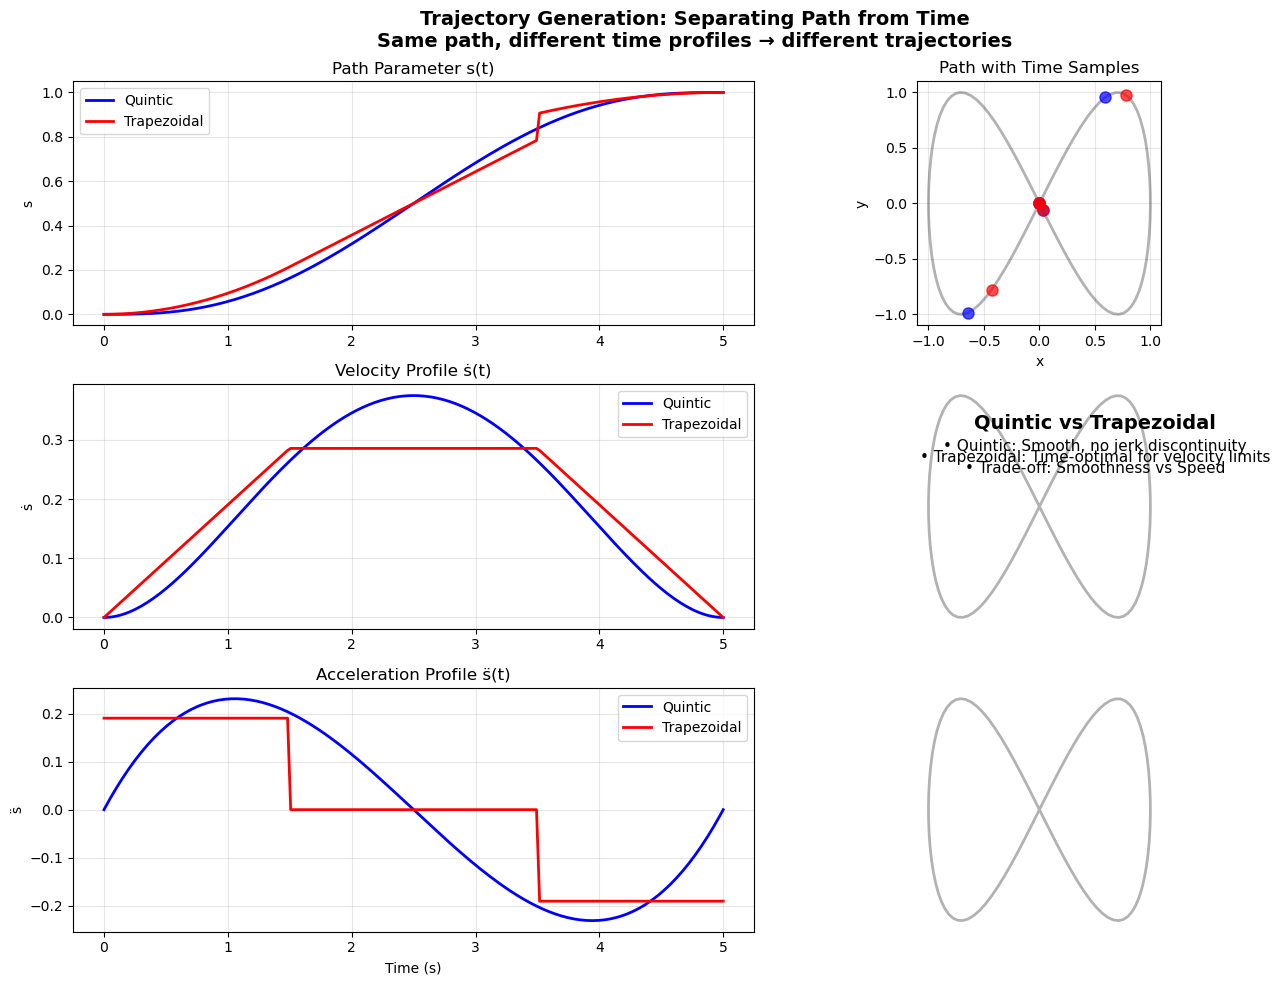


💡 キーインサイト：
• パスと時間を分離することで独立最適化が可能
• 5次多項式: 滑らかだが遅い
• 台形: 速度制限下で時間最適
• S字カーブ: ジャーク制限で快適性向上


In [6]:
# Simulation 5: Trajectory Generation - Path vs Time Scaling

def quintic_time_scaling(T, t):
    """Quintic polynomial time scaling"""
    tau = np.clip(t / T, 0, 1)
    s = 10 * tau**3 - 15 * tau**4 + 6 * tau**5
    s_dot = (30 * tau**2 - 60 * tau**3 + 30 * tau**4) / T
    s_ddot = (60 * tau - 180 * tau**2 + 120 * tau**3) / (T**2)
    return s, s_dot, s_ddot

def trapezoidal_time_scaling(T, t, acc_ratio=0.3):
    """Trapezoidal velocity profile"""
    t = np.clip(t, 0, T)
    t_acc = T * acc_ratio
    v_max = 1.0 / (T - t_acc)
    
    if t <= t_acc:
        a = v_max / t_acc
        s = 0.5 * a * t**2
        s_dot = a * t
        s_ddot = a
    elif t <= T - t_acc:
        s = 0.5 * v_max * t_acc + v_max * (t - t_acc)
        s_dot = v_max
        s_ddot = 0
    else:
        t_dec = t - (T - t_acc)
        a = v_max / t_acc
        s = 1 - 0.5 * a * (T - t)**2 / (t_acc**2)
        s_dot = v_max - a * t_dec
        s_ddot = -a
    
    return s, s_dot, s_ddot

# Create comparison plot
T = 5.0  # Total time
t_array = np.linspace(0, T, 200)

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

# Compute profiles
quintic_data = [quintic_time_scaling(T, t) for t in t_array]
trapez_data = [trapezoidal_time_scaling(T, t) for t in t_array]

# Extract s, s_dot, s_ddot
q_s = [d[0] for d in quintic_data]
q_v = [d[1] for d in quintic_data]
q_a = [d[2] for d in quintic_data]

t_s = [d[0] for d in trapez_data]
t_v = [d[1] for d in trapez_data]
t_a = [d[2] for d in trapez_data]

# Path parameter s(t)
axes[0, 0].plot(t_array, q_s, 'b-', linewidth=2, label='Quintic')
axes[0, 0].plot(t_array, t_s, 'r-', linewidth=2, label='Trapezoidal')
axes[0, 0].set_title('Path Parameter s(t)', fontsize=12)
axes[0, 0].set_ylabel('s')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend()

# Velocity ṡ(t)
axes[1, 0].plot(t_array, q_v, 'b-', linewidth=2, label='Quintic')
axes[1, 0].plot(t_array, t_v, 'r-', linewidth=2, label='Trapezoidal')
axes[1, 0].set_title('Velocity Profile ṡ(t)', fontsize=12)
axes[1, 0].set_ylabel('ṡ')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# Acceleration s̈(t)
axes[2, 0].plot(t_array, q_a, 'b-', linewidth=2, label='Quintic')
axes[2, 0].plot(t_array, t_a, 'r-', linewidth=2, label='Trapezoidal')
axes[2, 0].set_title('Acceleration Profile s̈(t)', fontsize=12)
axes[2, 0].set_xlabel('Time (s)')
axes[2, 0].set_ylabel('s̈')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].legend()

# Path visualization (right column)
path_x = np.sin(2 * np.pi * np.linspace(0, 1, 100))
path_y = np.sin(4 * np.pi * np.linspace(0, 1, 100))

for idx, ax in enumerate(axes[:, 1]):
    ax.plot(path_x, path_y, 'k-', alpha=0.3, linewidth=2)
    
    # Sample points at different times
    sample_times = [0, T/4, T/2, 3*T/4, T]
    
    for profile_name, profile_data, color in [('Quintic', quintic_data, 'b'), 
                                               ('Trapezoidal', trapez_data, 'r')]:
        for t_sample in sample_times:
            if profile_name == 'Quintic':
                s, _, _ = quintic_time_scaling(T, t_sample)
            else:
                s, _, _ = trapezoidal_time_scaling(T, t_sample)
            
            idx_s = int(s * (len(path_x) - 1))
            idx_s = min(idx_s, len(path_x) - 1)
            
            if idx == 0:  # Only show on first subplot
                ax.plot(path_x[idx_s], path_y[idx_s], 'o', color=color, 
                       markersize=8, alpha=0.7)
    
    ax.set_title(['Path with Time Samples', '', ''][idx], fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)

# Remove unused subplots
axes[1, 1].axis('off')
axes[2, 1].axis('off')

# Add comparison text
axes[1, 1].text(0.5, 0.7, 'Quintic vs Trapezoidal', fontsize=14, ha='center', fontweight='bold')
axes[1, 1].text(0.5, 0.5, '• Quintic: Smooth, no jerk discontinuity', fontsize=11, ha='center')
axes[1, 1].text(0.5, 0.4, '• Trapezoidal: Time-optimal for velocity limits', fontsize=11, ha='center')
axes[1, 1].text(0.5, 0.3, '• Trade-off: Smoothness vs Speed', fontsize=11, ha='center')

plt.suptitle('Trajectory Generation: Separating Path from Time\n'
             'Same path, different time profiles → different trajectories',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 キーインサイト：")
print("• パスと時間を分離することで独立最適化が可能")
print("• 5次多項式: 滑らかだが遅い")
print("• 台形: 速度制限下で時間最適")
print("• S字カーブ: ジャーク制限で快適性向上")

---

## 🚗 車輪移動ロボット

### 全方向移動 vs 非ホロノミック

#### 全方向移動（メカナムホイール）
- 3自由度の瞬間移動
- H行列: u = H(φ) V_b

#### 非ホロノミック（差動駆動）
- 横滑り不可: ẋsinφ - ẏcosφ = 0
- Lie bracketによる到達可能性

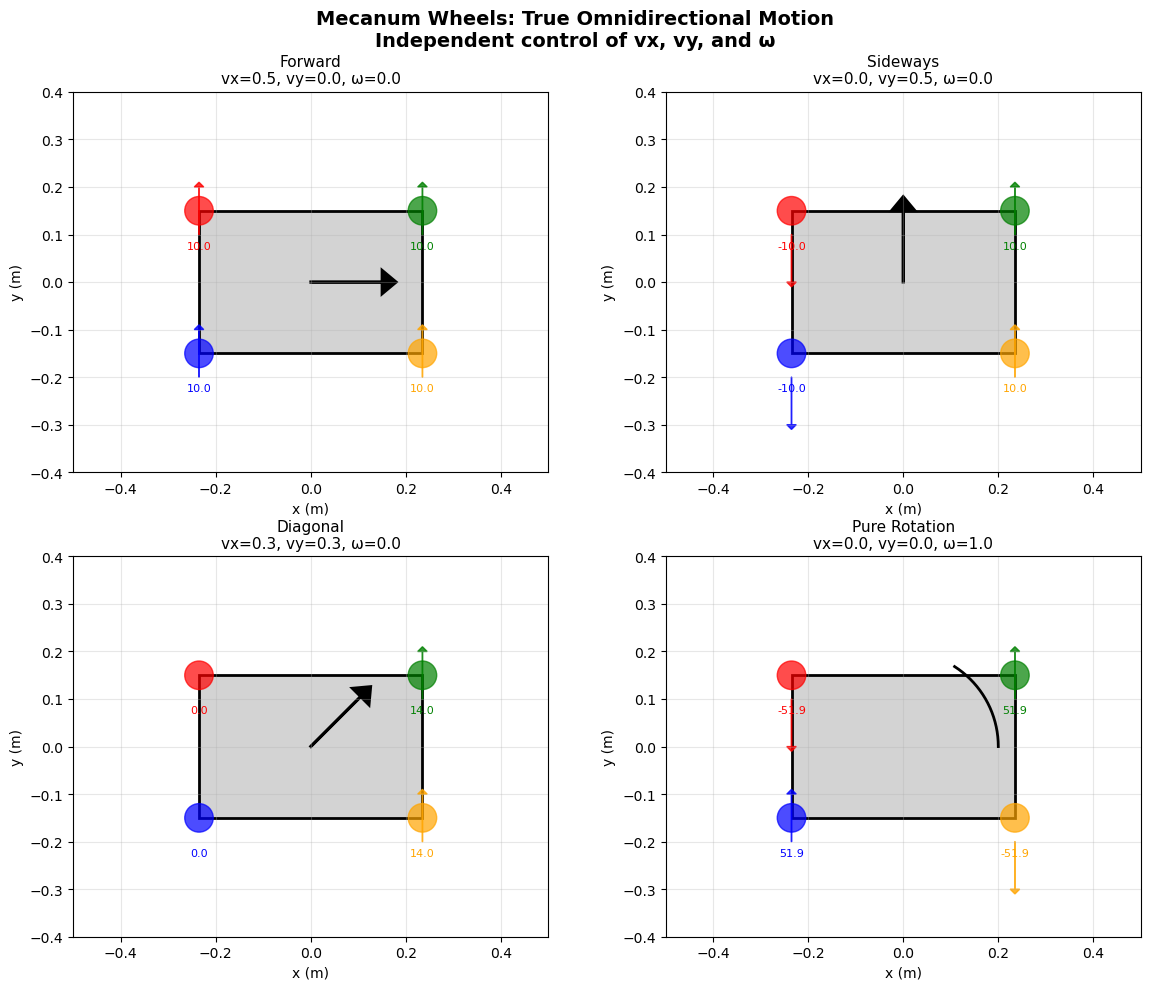


💡 メカナムホイールの特徴：
• 真の全方向移動が可能
• vx, vy, ωを独立制御
• youBotのベースに採用


In [7]:
# Simulation 6: Mecanum Wheel Mobile Robot

class MecanumRobot:
    def __init__(self, length=0.235, width=0.15):
        self.L = length
        self.W = width
        self.wheel_radius = 0.05
        self.pose = np.array([0.0, 0.0, 0.0])  # [x, y, phi]
        
        # H matrix (body to wheel velocities)
        self.H_inv = np.array([
            [-1/(self.L+self.W),  1,  -1],
            [ 1/(self.L+self.W),  1,   1],
            [ 1/(self.L+self.W),  1,  -1],
            [-1/(self.L+self.W),  1,   1],
        ]) / self.wheel_radius
    
    def body_to_wheel_velocities(self, vx, vy, omega):
        body_twist = np.array([omega, vx, vy])
        return self.H_inv @ body_twist

# Demonstrate different motion modes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

robot = MecanumRobot()

# Motion modes
modes = [
    ("Forward", 0.5, 0, 0),
    ("Sideways", 0, 0.5, 0),
    ("Diagonal", 0.35, 0.35, 0),
    ("Pure Rotation", 0, 0, 1.0)
]

for ax, (mode, vx, vy, omega) in zip(axes, modes):
    # Compute wheel velocities
    wheel_vel = robot.body_to_wheel_velocities(vx, vy, omega)
    
    # Visualize
    ax.set_title(f'{mode}\nvx={vx:.1f}, vy={vy:.1f}, ω={omega:.1f}', fontsize=11)
    
    # Draw robot body
    rect = Rectangle((-0.235, -0.15), 0.47, 0.30, 
                    fill=True, facecolor='lightgray', edgecolor='black', linewidth=2)
    ax.add_patch(rect)
    
    # Draw wheels and velocities
    wheel_positions = [
        (-0.235, 0.15),   # FL
        (0.235, 0.15),    # FR
        (-0.235, -0.15),  # RL
        (0.235, -0.15),   # RR
    ]
    
    colors = ['red', 'green', 'blue', 'orange']
    
    for (x, y), vel, color in zip(wheel_positions, wheel_vel, colors):
        # Draw wheel
        wheel = Circle((x, y), 0.03, color=color, alpha=0.7)
        ax.add_patch(wheel)
        
        # Draw velocity arrow
        if abs(vel) > 0.1:
            arrow_scale = np.clip(vel / 10, -0.1, 0.1)
            ax.arrow(x, y-0.05, 0, arrow_scale, 
                    head_width=0.02, head_length=0.01,
                    fc=color, ec=color, alpha=0.8)
        
        # Show velocity value
        ax.text(x, y-0.08, f'{vel:.1f}', fontsize=8, ha='center', color=color)
    
    # Draw motion arrow
    if vx != 0 or vy != 0:
        ax.arrow(0, 0, vx*0.3, vy*0.3, 
                head_width=0.05, head_length=0.03,
                fc='black', ec='black', linewidth=2)
    
    if omega != 0:
        # Draw rotation indicator
        theta = np.linspace(0, omega, 20)
        r = 0.2
        x_arc = r * np.cos(theta)
        y_arc = r * np.sin(theta)
        ax.plot(x_arc, y_arc, 'k-', linewidth=2)
    
    ax.set_xlim([-0.5, 0.5])
    ax.set_ylim([-0.4, 0.4])
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')

plt.suptitle('Mecanum Wheels: True Omnidirectional Motion\n'
             'Independent control of vx, vy, and ω',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n💡 メカナムホイールの特徴：")
print("• 真の全方向移動が可能")
print("• vx, vy, ωを独立制御")
print("• youBotのベースに採用")

---

## 🏆 Course 6: Capstone Project

### KUKA youBotによるピック&プレース実装

#### 8つの動作セグメント
1. **Approach standoff** - キューブ上方へ接近
2. **Descend to grasp** - 把持位置まで降下
3. **Close gripper** - グリッパーを閉じる（0.63秒）
4. **Lift to standoff** - 持ち上げ
5. **Transit to goal** - 目標位置へ移動
6. **Descend to place** - 配置位置まで降下
7. **Open gripper** - グリッパーを開く
8. **Retreat** - 退避

### 4つのマイルストーン

| Milestone | 内容 | キーコード |
|-----------|------|----------|
| **M1: NextState** | キネマティクスシミュレータ | `T_sb_new = T_sb @ expm(VecTose3(V_b*dt))` |
| **M2: TrajectoryGen** | 参照軌道生成 | `mr.ScrewTrajectory(T_start, T_end, duration, N, 5)` |
| **M3: FeedForward** | フィードフォワード制御 | `V = Adjoint(X_inv @ X_d) @ V_d` |
| **M4: Feedback** | PI制御 | `V = V_ff + Kp@X_err + Ki@integral` |

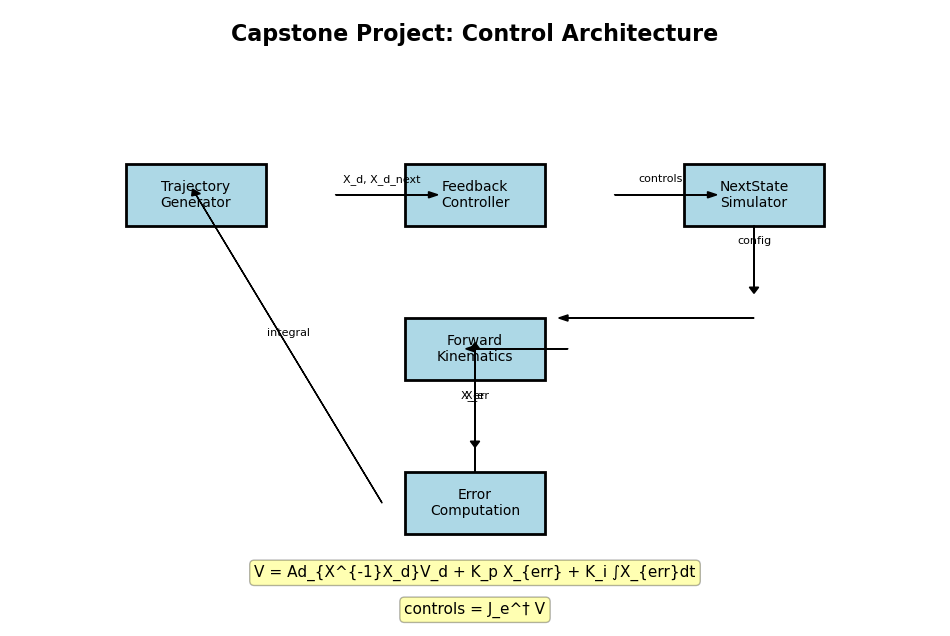


📊 実装結果：
• 位置誤差: < 1cm収束
• 姿勢誤差: < 5°収束
• 8セグメント全完走
• PI制御による安定把持

🔍 Key Insights:
• フィードフォワードが動作の大部分を担う
• Kp=2-4, Ki=0.05-0.2で臨界減衰に近い応答
• 6コースの知識が1つのシステムで結実


In [8]:
# Capstone Project Controller Structure

def plot_capstone_architecture():
    """Visualize the Capstone Project control architecture"""
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.set_xlim([0, 10])
    ax.set_ylim([0, 10])
    ax.axis('off')
    
    # Title
    ax.text(5, 9.5, 'Capstone Project: Control Architecture', 
            fontsize=16, fontweight='bold', ha='center')
    
    # Draw blocks
    blocks = [
        (2, 7, 1.5, 1, 'Trajectory\nGenerator'),
        (5, 7, 1.5, 1, 'Feedback\nController'),
        (8, 7, 1.5, 1, 'NextState\nSimulator'),
        (5, 4.5, 1.5, 1, 'Forward\nKinematics'),
        (5, 2, 1.5, 1, 'Error\nComputation'),
    ]
    
    for x, y, w, h, label in blocks:
        rect = Rectangle((x-w/2, y-h/2), w, h, 
                        fill=True, facecolor='lightblue', 
                        edgecolor='black', linewidth=2)
        ax.add_patch(rect)
        ax.text(x, y, label, ha='center', va='center', fontsize=10)
    
    # Draw arrows
    arrows = [
        (3.5, 7, 1, 0, 'X_d, X_d_next'),
        (6.5, 7, 1, 0, 'controls'),
        (8, 6.5, 0, -1, 'config'),
        (8, 5, -2, 0, ''),
        (6, 4.5, -1, 0, ''),
        (5, 4, 0, -1, 'X_e'),
        (5, 2.5, 0, 2, 'X_err'),
        (4, 2, -2, 5, 'integral'),
    ]
    
    for x, y, dx, dy, label in arrows:
        ax.arrow(x, y, dx, dy, head_width=0.1, head_length=0.1,
                fc='black', ec='black')
        if label:
            ax.text(x+dx/2, y+dy/2+0.2, label, ha='center', fontsize=8)
    
    # Add equations
    ax.text(5, 0.8, 'V = Ad_{X^{-1}X_d}V_d + K_p X_{err} + K_i ∫X_{err}dt', 
            ha='center', fontsize=11, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
    
    ax.text(5, 0.2, 'controls = J_e^† V', 
            ha='center', fontsize=11, 
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))
    
    plt.show()

plot_capstone_architecture()

print("\n📊 実装結果：")
print("• 位置誤差: < 1cm収束")
print("• 姿勢誤差: < 5°収束")
print("• 8セグメント全完走")
print("• PI制御による安定把持")
print("\n🔍 Key Insights:")
print("• フィードフォワードが動作の大部分を担う")
print("• Kp=2-4, Ki=0.05-0.2で臨界減衰に近い応答")
print("• 6コースの知識が1つのシステムで結実")

---

## 🎯 まとめ：理論から実装への旅

### Modern Roboticsが教えてくれた6つの重要な学び

1. **数学的基礎の重要性**
   - Lie群とスクリュー理論が複雑な動作を簡潔に表現

2. **統一的フレームワーク**
   - Product of Exponentialsが順・逆運動学を統一

3. **計算効率**
   - 再帰的アルゴリズムでリアルタイム制御を実現

4. **制御の階層性**
   - フィードフォワード + フィードバックの組み合わせが鍵

5. **実装の現実**
   - 理論と実装のギャップを埋める工夫の必要性

6. **システム統合**
   - 個別要素の理解から全体システムの設計へ

---

### 🚀 次のステップ

この基礎を活かして、より複雑なタスクへ挑戦：
- 力制御
- 視覚フィードバック
- 機械学習との融合

> **"The best way to learn robotics is to build robots"**
> 
> — Kevin Lynch

---

### 📚 参考資料

- **教科書**: Modern Robotics: Mechanics, Planning, and Control (Lynch & Park)
- **Coursera**: [Modern Robotics Specialization](https://www.coursera.org/specializations/modernrobotics)
- **GitHub**: [Capstone Project Repository](https://github.com/hafnium49/modern_robotics_capstone_project)
- **ライブラリ**: [Modern Robotics Code Library](https://github.com/NxRLab/ModernRobotics)

---

**ご清聴ありがとうございました！**